In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**IMPORTING THE LIBRARIES**

In [2]:
import numpy as np
import pandas as pd

**READING THE DATASET**

In [3]:
dataset = pd.read_csv("/content/gdrive/MyDrive/ML.VEC/daily_csv.csv")

In [4]:
dataset

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00
...,...,...
5948,2020-08-26,2.52
5949,2020-08-27,2.52
5950,2020-08-28,2.46
5951,2020-08-31,2.30


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5953 entries, 0 to 5952
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5953 non-null   object 
 1   Price   5952 non-null   float64
dtypes: float64(1), object(1)
memory usage: 93.1+ KB


In [6]:
dataset['year'] = pd.DatetimeIndex(dataset['Date']).year
dataset['month'] = pd.DatetimeIndex(dataset['Date']).month
dataset['day'] = pd.DatetimeIndex(dataset['Date']).day

In [7]:
dataset

,Date,Price,year,month,day
0,1997-01-07,3.82,1997,1,7
1,1997-01-08,3.80,1997,1,8
2,1997-01-09,3.61,1997,1,9
3,1997-01-10,3.92,1997,1,10
4,1997-01-13,4.00,1997,1,13
...,...,...,...,...,...
5948,2020-08-26,2.52,2020,8,26
5949,2020-08-27,2.52,2020,8,27
5950,2020-08-28,2.46,2020,8,28
5951,2020-08-31,2.30,2020,8,31


**DROPING THE DATE COLUMN**

In [8]:
dataset.drop('Date', axis=1, inplace=True)

**CHECKING FOR NULL VALUES**

In [9]:
dataset.isnull().any()

Price     True
year     False
month    False
day      False
dtype: bool

**HANDLING MISSING VALUES**

In [10]:
dataset['Price'].fillna(dataset['Price'].mean(),inplace=True)

In [11]:
dataset.isnull().any()

Price    False
year     False
month    False
day      False
dtype: bool

In [12]:
dataset

,Price,year,month,day
0,3.82,1997,1,7
1,3.80,1997,1,8
2,3.61,1997,1,9
3,3.92,1997,1,10
4,4.00,1997,1,13
...,...,...,...,...
5948,2.52,2020,8,26
5949,2.52,2020,8,27
5950,2.46,2020,8,28
5951,2.30,2020,8,31


**DATA VISUVALIZATION**

No handles with labels found to put in legend.


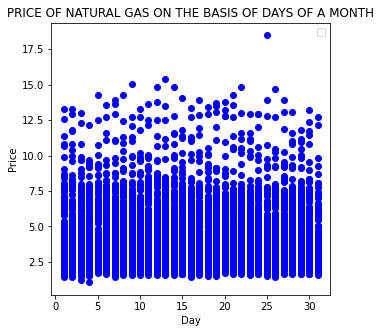

In [13]:
import matplotlib.pyplot as plt
#plot size
fig=plt.figure(figsize=(5,5))
plt.scatter(dataset['day'],dataset['Price'],color='blue')
#Set the label for the x-axis.
plt.xlabel('Day')
#Set the label for the y-axis.
plt.ylabel('Price')
#Set a title for the axes.
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF DAYS OF A MONTH')
#Place a legend on the axes.
plt.legend()

No handles with labels found to put in legend.


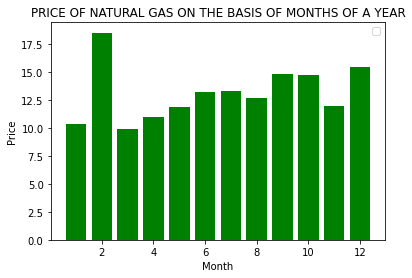

In [14]:
import matplotlib.pyplot as plt
plt.bar(dataset['month'],dataset['Price'],color='green')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

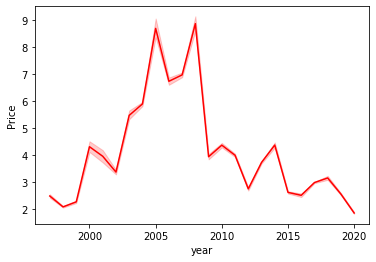

In [15]:
import seaborn as sns
sns.lineplot(x='year',y='Price',data=dataset,color='red')

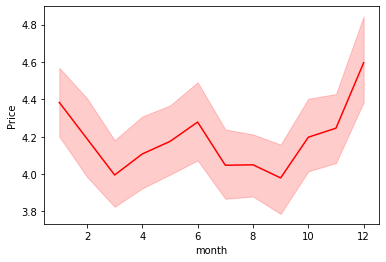

In [16]:
import seaborn as sns
sns.lineplot(x='month',y='Price',data=dataset,color='red')

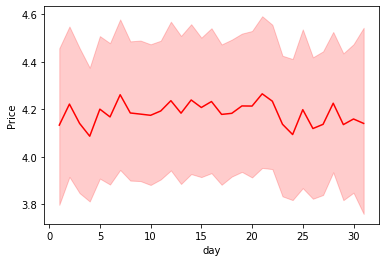

In [17]:
import seaborn as sns
sns.lineplot(x='day',y='Price',data=dataset,color='red')

No handles with labels found to put in legend.


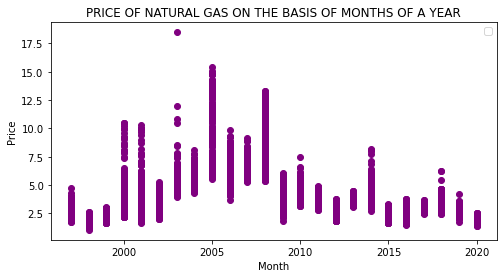

In [18]:
fig=plt.figure(figsize=(8,4))
plt.scatter(dataset['year'],dataset['Price'],color='purple')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

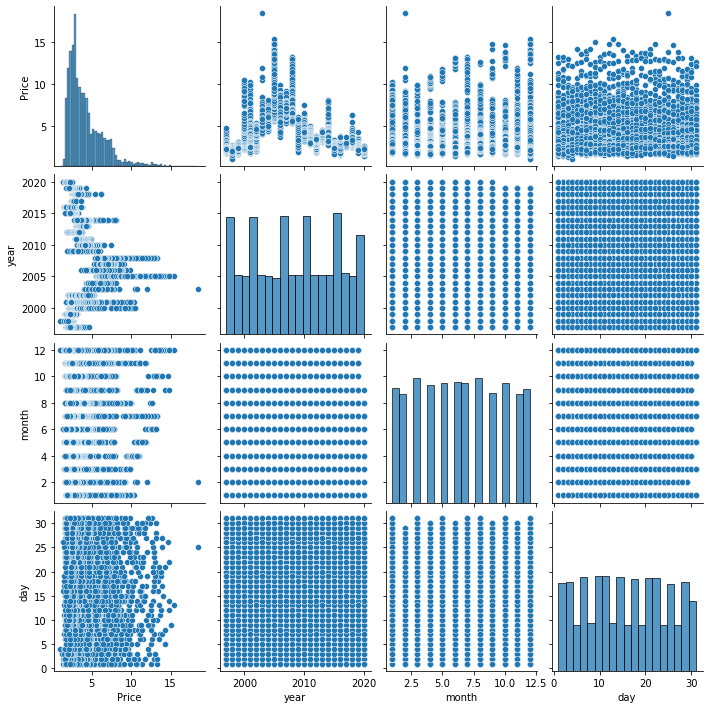

In [19]:
import seaborn as sns
sns.pairplot(dataset)
plt.show()

**Split the dataset into X(independent variable) and Y(dependent variable)**

In [20]:
x=dataset.iloc[:,1:4].values #inputs
y=dataset.iloc[:,0:1].values #output price only

In [21]:
x

array([[1997,    1,    7],
       [1997,    1,    8],
       [1997,    1,    9],
       ...,
       [2020,    8,   28],
       [2020,    8,   31],
       [2020,    9,    1]])

In [22]:
y

array([[3.82],
       [3.8 ],
       [3.61],
       ...,
       [2.46],
       [2.3 ],
       [2.22]])

**Split data into train and test**


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
x_train.shape

(4762, 3)

In [25]:
y_train.shape

(4762, 1)

**DECISION TREE**

In [26]:
#import decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
#fitting the model or training the model
dtr.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [27]:
y_pred=dtr.predict(x_test)
y_pred

array([2.29, 3.24, 1.8 , ..., 3.42, 4.9 , 2.66])

In [28]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)
accuracy

0.9770677304396199

In [29]:
pre=dtr.predict([[1997,1,7]])
pre

array([3.82])

In [30]:
pre1=dtr.predict([[2021,7,15]])
pre1

array([1.76])

In [31]:

import pickle
pickle.dump(dtr,open("dtr.pkl","wb"))